In [21]:
#import all the package needed
from __future__ import print_function
import torch
import numpy as np
import MNISTtools as mit
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable
from __future__ import print_function
import torch.utils.data as Data
import torchvision
import os
import matplotlib.pylab as plt
# import Augmentor

In [23]:
#define the architecture & all the function needed

#to be complete:
#1:the function to normalize images
#2:the function to do image augmentation


#construct the architecture of the network
class simNet(nn.Module):
    def __init__ (self):
        super(simNet,self).__init__()
        self.conv1 = nn.Conv2d (3,6,5)
        torch.nn.init.xavier_uniform(self.conv1.weight)
        
        self.conv2 = nn.Conv2d (6,16,5)
        torch.nn.init.xavier_uniform(self.conv2.weight)
        
        self.conv3 = nn.Conv2d(16,30,5)
        torch.nn.init.xavier_uniform(self.conv2.weight)
        
        self.conv4 = nn.Conv2d(30,80,5)
        torch.nn.init.xavier_uniform(self.conv2.weight)
        
        
        self.fc1 = nn.Linear(5040,1000)
        torch.nn.init.xavier_uniform(self.fc1.weight)
        self.fc2 = nn.Linear (1000,800)
        torch.nn.init.xavier_uniform(self.fc2.weight)
        self.fc3 = nn.Linear (800,500)
        torch.nn.init.xavier_uniform(self.fc3.weight)
        self.fc4 = nn.Linear (500,10)
        torch.nn.init.xavier_uniform(self.fc3.weight)

        self.fc5 = nn.Linear(5040,1000)
        torch.nn.init.xavier_uniform(self.fc1.weight)
        self.fc6 = nn.Linear (1000,800)
        torch.nn.init.xavier_uniform(self.fc2.weight)
        self.fc7 = nn.Linear (800,500)
        torch.nn.init.xavier_uniform(self.fc3.weight)
        self.fc8 = nn.Linear (500,10)
        torch.nn.init.xavier_uniform(self.fc3.weight)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv4(x)),(2,2))
        x1 = x.view(-1,self.num_flat_features(x))
        
        x = F.relu(self.fc1(x1))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output_1 = self.fc4(x)
        
        y = F.relu(self.fc5(x1))
        y = F.relu(self.fc6(y))
        y = F.relu(self.fc7(y))
        output_2 = self.fc8(y)
        
        return output_1,output_2
    
    def num_flat_features(self,x):
        size = x.size()[1:]
        return np.prod(size)

    
def label2onehot(lbl):                     
    d = np.zeros((lbl.max() + 1, lbl.size)) 
    d[lbl, np.arange(0, lbl.size)] = 1 
    return d

#this function is written for assignment#2,so to be modified
def normalize_MNIST_images(x):
    num_f = x.shape[0]
    x=x.astype(np.float64)
    mean_each_feature = np.mean(x,axis = 1).reshape(num_f,1)
    result = (x - mean_each_feature)/255
    return result,mean_each_feature

def accuracy(prediction,lable):
    assert len(prediction) == len(lable)
    return np.sum(prediction == lable).astype(float)/len(prediction)
    
def onehot2label(d):
    lbl = d.argmax(axis=0) 
    return lbl    

def Get_Desktop_Path():
    return os.path.join(os.path.expanduser("~"), 'Desktop')

def load_images(index_to_use):
    im = np.zeros((218,178,3,len(index_to_use)))
    for i in range(202599):
        if i in index_to_use:
            index = i
            i = '0'*(6-len(str(i+1)))+str(i+1)
            im[:,:,:,index_to_use.index(index)] = plt.imread('/datasets/ee285s-public/CelebA/Img/img_align_celeba/%s.jpg'%i)
    return im

#do the selection and preprocessing for labels,also could get which images(images' index) within dataset is qualified
def load_labels():
    # Bald             4
    # Black_Hair       8 
    # Blond_Hair       9      
    # Brown_Hair       11
    # Gray_Hair       17
    # Straight_Hair   32
    # Wavy_Hair       33
    # Wearing_Hat     35
    with open('/datasets/ee285s-public/CelebA/Anno/list_attr_celeba.txt','r')  as f:
        p_temp=f.readlines()
    p = []
    for i in p_temp:
        i = i[11:]
        i = i[:-2]
        i = i.replace(' ','')
        i = i.replace('-1','0')
        p.append(i)
    p = p[2:]   
    ylabel_temp = np.zeros((202599,40))
    index = 0
    for each in p:
        temp_x = []
        for i in each:
            temp_x.append(int(i))
        ylabel_temp[index,:] = np.array(temp_x)
        index += 1
    ylabel_for_color = ylabel_temp[:,[8,9,11,17]]
    ylabel_for_style = ylabel_temp[:,[4,32,33,35]]
    index_to_delete = image_to_abandon(ylabel_for_color,ylabel_for_style)
    index_to_use = np.delete(np.arange(202599),index_to_delete)
    return ylabel_for_color,ylabel_for_style,index_to_use.tolist()

def image_to_abandon(ylabel_for_color,ylabel_for_style):
    which_images_to_delete_1_1 = np.where(np.sum(ylabel_for_color,1) == 0)[0].tolist()
    which_images_to_delete_1_2 = np.where(np.sum(ylabel_for_style,1) == 0)[0].tolist()
    which_images_to_delete_2_1 = np.where(np.sum(ylabel_for_color,1) == 2)[0].tolist()
    which_images_to_delete_2_2 = np.where(np.sum(ylabel_for_color,1) == 3)[0].tolist()
    which_images_to_delete_2_3 = np.where(np.sum(ylabel_for_color,1) == 4)[0].tolist()
    which_images_to_delete_3_1 = np.where(np.sum(ylabel_for_style,1) == 2)[0].tolist()
    which_images_to_delete_3_2 = np.where(np.sum(ylabel_for_style,1) == 3)[0].tolist()
    which_images_to_delete_3_3 = np.where(np.sum(ylabel_for_style,1) == 4)[0].tolist()
    result = set(which_images_to_delete_1_1 + which_images_to_delete_1_2 + which_images_to_delete_2_1 + which_images_to_delete_2_2 + which_images_to_delete_2_3 + which_images_to_delete_3_1 + which_images_to_delete_3_2 + which_images_to_delete_3_3)
    return list(result)

#to randomly assign images' index into different batches per epoch
def get_the_step_indexassignment(train_family,batch):
    index_to_use = train_family
    np.random.shuffle(index_to_use)
    per_batch = family_of_index_to_use(index_to_use,batch)
    num_batch = len(per_batch)
    return per_batch,num_batch

#a subfunction within get_the_step_indexassignment,it's function is grouping the selected index
#into different batchs.
def family_of_index_to_use(index_to_use,batch = 1000):
    start = batch
    end = start + batch
    family_of_index_to_use = [index_to_use[0:batch]]
    while len(family_of_index_to_use[-1]) >= batch:
        family_of_index_to_use.append(index_to_use[start:end])
        start += batch
        end += batch
    return family_of_index_to_use
    
#use the assigned index to call the selected images from dataset.     
def get_x_for_thisbatch(perbatch_index):    
    x = load_images(perbatch_index)
    x = torch.from_numpy(np.moveaxis(np.moveaxis(x,-1,0),-1,1)).float()
    return x
#call the labels    
def get_y_for_thisbatch(perbatch_index,ylabel):
    y = ylabel[perbatch_index,:].argmax(axis=1)
    y = torch.from_numpy(y).type(torch.LongTensor)  
    return y

#this part of code is written to do the image augmentation,however they are abandoned 
# def augmentor():    
#     p = Augmentor.Pipeline('/datasets/ee285s-public/CelebA/Img/img_align_celeba')
#     p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.flip_left_right(probability=1)
#     p.zoom(probability=0.5, min_factor=1.2, max_factor=1.3)
#     p.gaussian_distortion(probability = 1,grid_width = 5,grid_height = 5,magnitude = 5,corner = 'bell',method = 'in')
#     p.skew(probability = 0.5)
#     p.process()
#     p.sample(20)
    
# def batch_rename_for_augmentor():
#     i=0
#     path='/Users/sdret/Desktop/image/img_align_celeba/output'
#     filelist=os.listdir(path)
#     for files in filelist:
#         i=i+1
#         Olddir=os.path.join(path,files)
#         filename=os.path.splitext(files)[0]
#         filetype=os.path.splitext(files)[1]
#         Newdir=os.path.join('/Users/sdret/Desktop/image/img_align_celeba/output',files[26:32]+filetype);
#         os.rename(Olddir,Newdir)

# def load_original_created_image():
#     im = np.zeros((218,178,3,10000))
#     for i in range(10000):
#         index = i
#         i = '0'*(6-len(str(i+1)))+str(i+1)
#         im[:,:,:,index] = plt.imread('/Users/sdret/Desktop/image/img_align_celeba/output/%s.jpg'%i)
#         print('%dth image loaded'%index)
#     return im

#this part of code is to get the path of target file on pod
# def processDirectory (args, dirname, filenames):
#      print 'Directory',dirname
#     for filename in filenames:
#         print ' File',filename

(218, 178, 3)

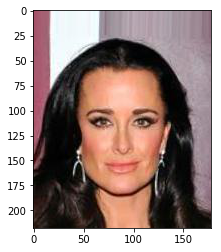

In [25]:
# os.path.walk(r'/datasets/ee285s-public/CelebA', processDirectory, None )
test = plt.imread('/datasets/ee285s-public/CelebA/Img/img_align_celeba/202598.jpg')
plt.imshow(test)
test.shape


In [26]:
#because the dataset we used are not initially suitable for our project,so we do some preprocessing &
#selection for it,all the first-step processing are included in the function load_labels()
#index_to_use is the index of image qualified for future use.
ylabel_for_color,ylabel_for_style,index_to_use = load_labels()
#for the randomness,we do the shuffling to the index
np.random.shuffle(index_to_use)
#because the limitaion of the cpu,we can not load all the images and into matrix form,instead
#when we need them,we load the data.
#separate the data into train & validation & test sets
train_family = index_to_use[0:(72557/10)*6]
validation_family = index_to_use[(72557/10)*6:(72557/10)*8]
test_family = index_to_use[(72557/10)*8:]

In [27]:
#set all the hyperparameters(to be completed)
EPOCH = 100
LR = 0.00001             
batch = 30   

net = simNet()
net.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=LR)

In [30]:
running_loss = 0
running_loss_2 = 0
variation_loss = []
variation_loss_val = []
test_history_accuracy = []

# if sure to start,then unlock the following save and load command
# net.load_state_dict(torch.load('params.pkl'))
for epoch in range(EPOCH):
    perbatch_index,num_batch = get_the_step_indexassignment(train_family,batch)
    
    #get the epoch accuracy,due to the limitation of memory,we only use part of the test data to do the computation     
    index_accur = validation_family
    np.random.shuffle(index_accur)
    n = len(index_accur)/20
    x = Variable(get_x_for_thisbatch(index_accur[0:n])).cuda()
    y_col = get_y_for_thisbatch(index_accur[0:n],ylabel_for_color).numpy()
    y_sty = get_y_for_thisbatch(index_accur[0:n],ylabel_for_style).numpy()
    output_for_accuracy_col,output_for_accuracy_sty = net(x)
    prediction_col = onehot2label(output_for_accuracy_col.cpu().data.numpy().T)
    prediction_sty = onehot2label(output_for_accuracy_sty.cpu().data.numpy().T)
    accuracy_of_this_epoch_1 = accuracy(prediction_col,y_col)
    accuracy_of_this_epoch_2 = accuracy(prediction_sty,y_sty)
    accuracy_of_this_epoch = accuracy_of_this_epoch_2 + accuracy_of_this_epoch_1
    print('accuracy of epoch',epoch+1,'=',accuracy_of_this_epoch_1)
    print('accuracy of epoch',epoch+1,'=',accuracy_of_this_epoch_2)
    
    #early stopping to avoid overfitting
    if epoch > 3:
        if accuracy_of_this_epoch < (test_history_accuracy[-1]+test_history_accuracy[-2]+test_history_accuracy[-3])/3:
            break;
    test_history_accuracy.append(accuracy_of_this_epoch)
    
    #train the model
    for step in range(num_batch):
        y_col = get_y_for_thisbatch(perbatch_index[step],ylabel_for_color)
        y_sty = get_y_for_thisbatch(perbatch_index[step],ylabel_for_style)
        x = get_x_for_thisbatch(perbatch_index[step])
        b_y_col = Variable(y_col).cuda()
        b_y_sty = Variable(y_sty).cuda()
        b_x = Variable(x).cuda()
        output_col,output_sty = net(b_x)             
        loss = loss_func(output_col, b_y_col) + loss_func(output_sty, b_y_sty)
        
        optimizer.zero_grad()           
        loss.backward()                 
        optimizer.step()
        
        #get the variation of lost of validation set
        #to save source,just compute partial batch size of it
        arr = validation_family             
        np.random.shuffle(arr)
        arr = arr[0:batch/2]
        yval_temp_col = get_y_for_thisbatch(arr,ylabel_for_color)
        yval_temp_sty = get_y_for_thisbatch(arr,ylabel_for_style)
        xval_temp = get_x_for_thisbatch(arr)
        b_y_col = Variable(yval_temp_col).cuda()
        b_y_sty = Variable(yval_temp_sty).cuda()
        b_x_2 = Variable(xval_temp).cuda()
        output_col,output_sty = net(b_x_2)             
        loss_2 = loss_func(output_col, b_y_col) + loss_func(output_sty, b_y_sty)
        
        running_loss += loss
        running_loss_2 += loss_2
        if step % 50 == 0:
            variation_loss.append(running_loss.cpu().data.numpy())
            variation_loss_val.append(running_loss_2.cpu().data.numpy())
            print(running_loss.cpu().data.numpy())                                              #loss per sample
            running_loss = 0.0
            running_loss_2 = 0.0
        #get some test prediction for comparsion 
        if step % 300 == 0:
            pre_select = test_family
            np.random.shuffle(pre_select)
            xtest = get_x_for_thisbatch(pre_select[:10])
            x = Variable(xtest).cuda()
            y_col = get_y_for_thisbatch(pre_select[:10],ylabel_for_color).numpy()
            y_sty = get_y_for_thisbatch(pre_select[:10],ylabel_for_style).numpy()
            output_for_accuracy_col,output_for_accuracy_sty = net(x)
            prediction_col = onehot2label(output_for_accuracy_col.cpu().data.numpy().T)
            prediction_sty = onehot2label(output_for_accuracy_sty.cpu().data.numpy().T)
            print('the original label for color is',y_col)
            print('and the prediction for color is',prediction_col)
            print('----------------------------------------------------')
            print('the original label for style is',y_sty)
            print('and the prediction for style is',prediction_sty)
            
# torch.save(net.state_dict(), 'params.pkl')  

accuracy of epoch 1 = 0.32413793103448274
accuracy of epoch 1 = 0.0
[4.754691]
the original label for color is [0 1 2 1 0 1 0 0 2 1]
and the prediction for color is [1 0 0 0 1 0 1 1 0 1]
----------------------------------------------------
the original label for style is [2 1 1 2 1 2 1 2 2 2]
and the prediction for style is [6 6 6 6 6 6 6 6 6 6]
[108.70687]
[80.91175]
[70.79156]
[69.90731]
[65.72458]
[65.42772]
the original label for color is [2 2 0 2 1 2 2 0 1 0]
and the prediction for color is [0 2 2 1 1 2 2 0 1 0]
----------------------------------------------------
the original label for style is [1 2 2 2 2 2 2 2 2 1]
and the prediction for style is [2 2 2 2 2 2 2 2 2 2]
[61.199684]
[64.432465]
[61.05667]
[61.079357]


KeyboardInterrupt: 

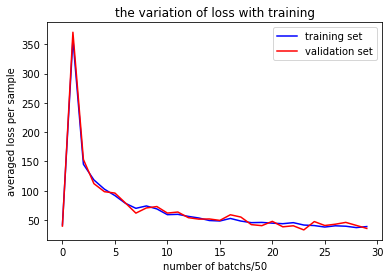

In [32]:
#plot variation loss 
plt.plot(range(len(variation_loss)),variation_loss,'b')
plt.plot(range(len(variation_loss_test)),variation_loss_test,'r')
plt.xlabel('number of batchs/50')
plt.ylabel('averaged loss per sample')
plt.title('the variation of loss with training')
plt.legend(['training set', 'validation set'])
plt.show()

# plt.plot(range(len(test_history_accuracy)),test_history_accuracy,'y')
# plt.xlabel('number of epoch')
# plt.ylabel('accuracy of validation set')
# plt.title('the variation of accuracy of validation set')
# plt.show()